In [66]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image

In [80]:
df = pd.read_csv("data-jumlah-penerbitan-akta-perceraian-penduduk-non-muslim-triwulan-4-tahun-2021.csv")
df.head(10)

,tahun,triwulan,nama_kota,jumlah
0,2021,4,Jakarta Pusat,60
1,2021,4,Jakarta Utara,119
2,2021,4,Jakarta Barat,167
3,2021,4,Jakarta Selatan,81
4,2021,4,Jakarta Timur,84


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tahun      5 non-null      int64 
 1   triwulan   5 non-null      int64 
 2   nama_kota  5 non-null      object
 3   jumlah     5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [68]:
df.loc[df['nama_kota'] == 'Jakarta Barat', 'tahun'] = 2021

In [69]:
X = df[['triwulan', 'nama_kota']]
y = df['jumlah']

In [70]:
# Mengubah atribut kategorikal menjadi numerik dengan one-hot encoding
X_encoded = pd.get_dummies(X)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [71]:
model = DecisionTreeClassifier()

In [72]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
accuracy = model.score(X_test, y_test)
print('Akurasi model: {:.2f}'.format(accuracy))

Akurasi model: 0.00


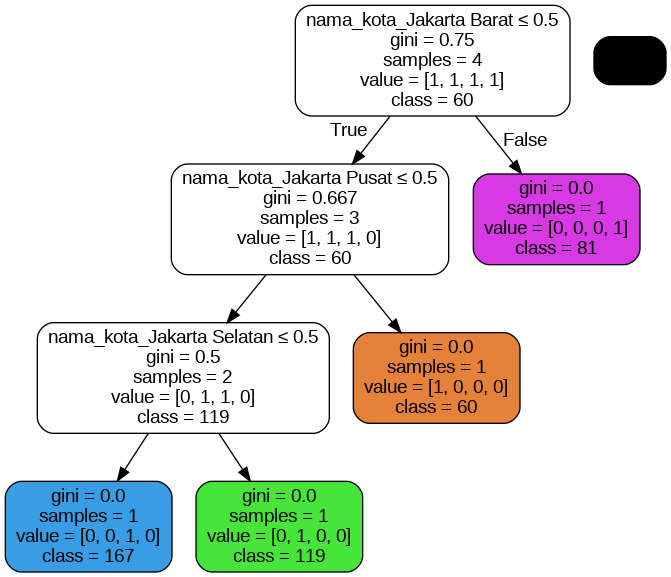

In [74]:
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_encoded.columns,
                                class_names=y.astype(str).unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [75]:
# Contoh prediksi
new_data = {
    'triwulan': [4],
    'nama_kota_Jakarta Barat': [0],
    'nama_kota_Jakarta Pusat': [0],
    'nama_kota_Jakarta Selatan': [0],
    'nama_kota_Jakarta Timur': [0],
    'nama_kota_Jakarta Utara': [1]
}

In [76]:
new_df = pd.DataFrame(new_data)

In [77]:
prediction = model.predict(new_df)

In [78]:
print('Prediksi jumlah: {}'.format(prediction[0]))

Prediksi jumlah: 84
